In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# 导包获取糖尿病数据集
from sklearn.datasets import load_diabetes

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, f1_score, PredictionErrorDisplay
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


In [2]:
# This is a package in preview.

data_diabetes = load_diabetes()

In [3]:
data =  data_diabetes['data']
target = data_diabetes['target']
feature_names = data_diabetes['feature_names']

#现在三个数据都是numpy的一维数据形式，将她们组合成dataframe，可以更直观地观察数据
df =  pd.DataFrame(data,columns = feature_names)
df.head()  # 查看前几行数据

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [5]:
def BuidModel(modelKey):
    if modelKey == 'svm':

        return SVC(probability=True, random_state=0)

    elif modelKey == 'rf':

        return RandomForestClassifier(n_estimators=512, random_state=0)

    elif modelKey == 'mlp':

        return MLPClassifier(max_iter=10000, random_state=0)

    elif modelKey == 'logistic':

        return LogisticRegression(random_state=0)

    elif modelKey == 'liner':

        return LinearRegression()


In [6]:
train_X,test_X,train_Y,test_Y =  train_test_split(data,target,train_size =0.8)


model = BuidModel('liner')

# 3、训练数据
model.fit(train_X,train_Y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

# 4、评估模型
model.score(train_X,train_Y)

0.5183710925607455

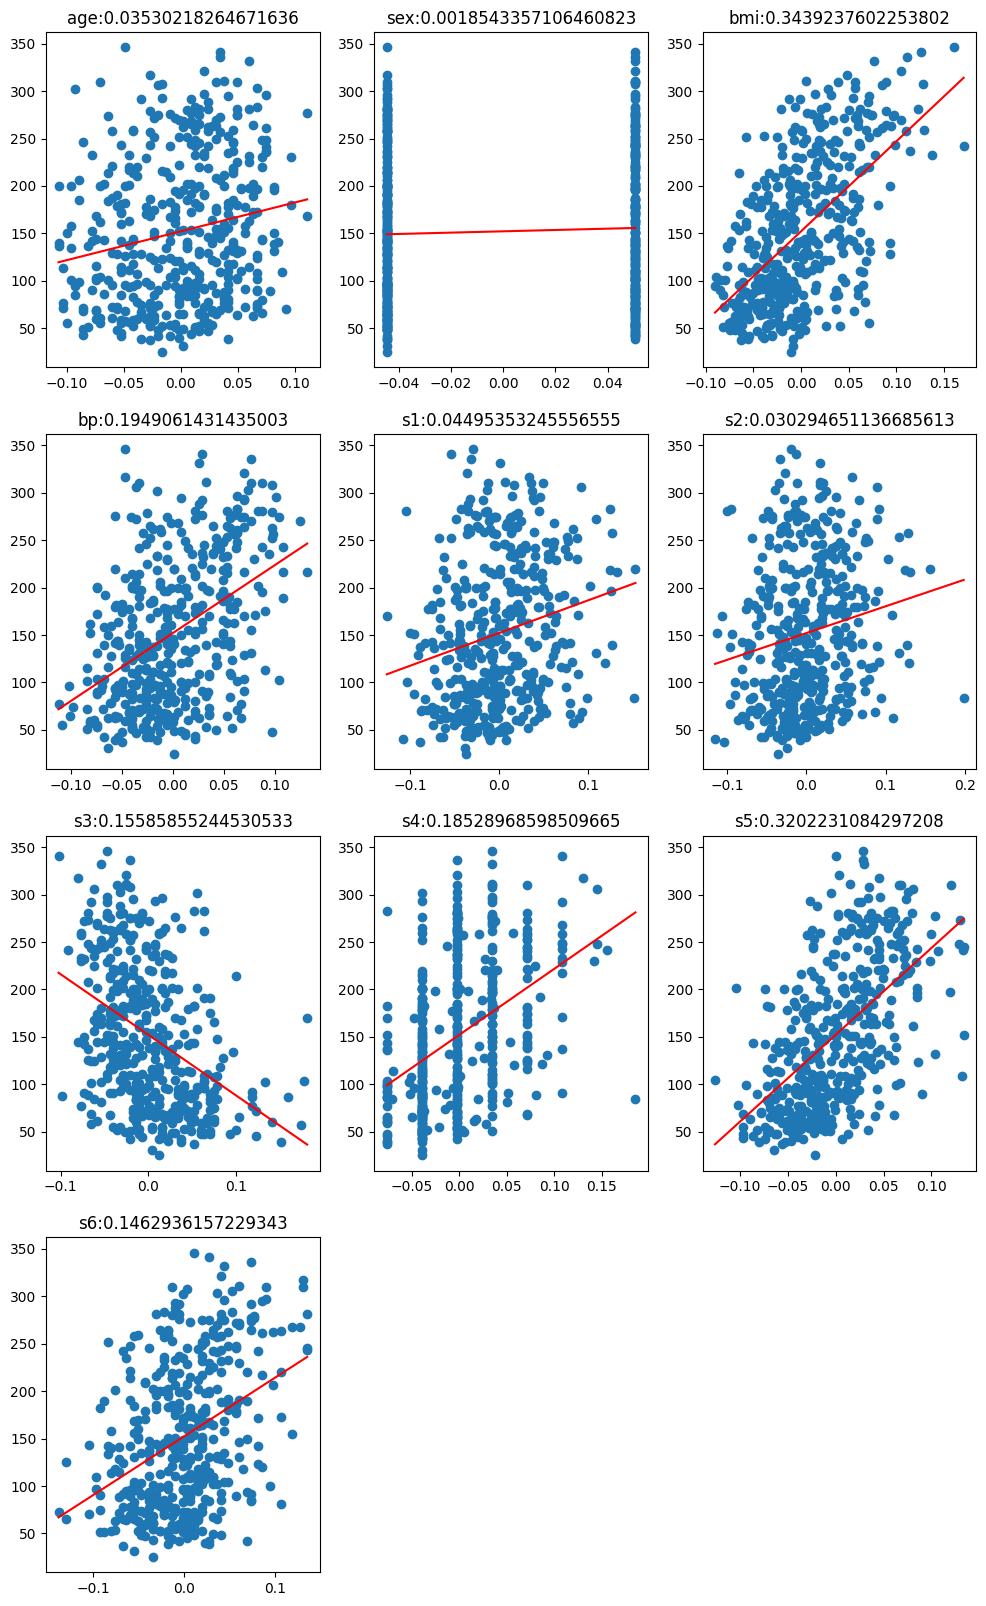

In [7]:
# 2、循环对每个特征值进行建模训练，作图

# 建立画板，作图5行2列的图
plt.figure(figsize=(12, 20))
for i,col in enumerate(df.columns):  #enumerate 枚举
    train_X = df.loc[:,col].values.reshape(-1,1)
# 每一次循环，都取出datafram中的一列数据，是一维Series数据格式，但是线性回归模型要求传入的是一个二维数据，因此利用reshape修改其形状
    train_Y = target
    linear_model = LinearRegression()    # 构建模型
    linear_model.fit(train_X,train_Y)    #训练模型
    score = linear_model.score(train_X,train_Y)   # 评估模型
#  以训练数据为X轴，标记为Y 轴，画出散点图，直观地看每个特征和标记直接的关系
    axes = plt.subplot(4,3,i+1)
    plt.scatter(train_X,train_Y)
# 画出每一个特征训练模型得到的拟合直线 y= kx + b
    k =  linear_model.coef_     # 回归系数
    b =  linear_model.intercept_   # 截距
    x = np.linspace(train_X.min(),train_X.max(),100)
    y = k * x + b
# 作图
    plt.plot(x,y,c='red')
    axes.set_title(col + ':' + str(score))
plt.show()

ValueError: columns are missing: {'parch', 'sibsp', 'fare'}

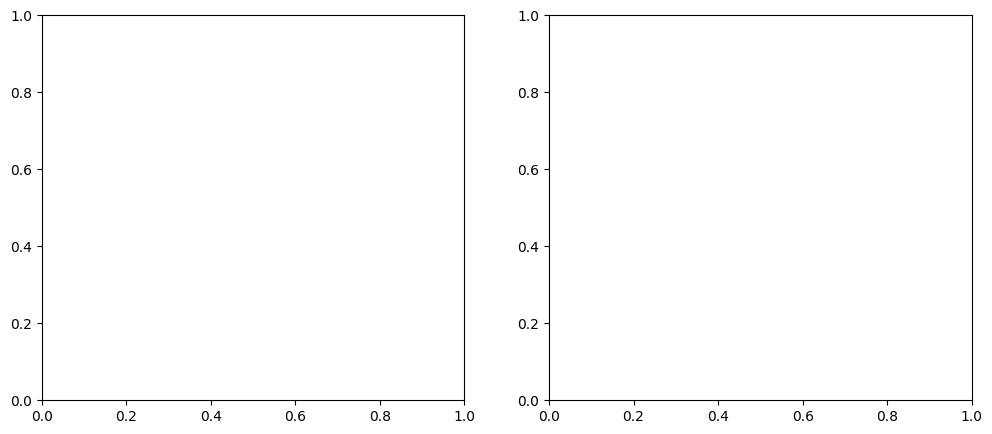

In [14]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(X.shape[1])], random_state=0
)
hist_no_interact.fit(X, y)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    model, X, y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    model, X, y, kind="residual_vs_predicted", ax=axs[1]
)

In [9]:
X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
X = X.select_dtypes(["number", "category"]).drop(columns=["body"])

In [10]:
categorical_features = ["pclass", "sex", "embarked"]
model = make_pipeline(
    ColumnTransformer(
        transformers=[("cat", OrdinalEncoder(), categorical_features)],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(random_state=0),
).fit(X, y)

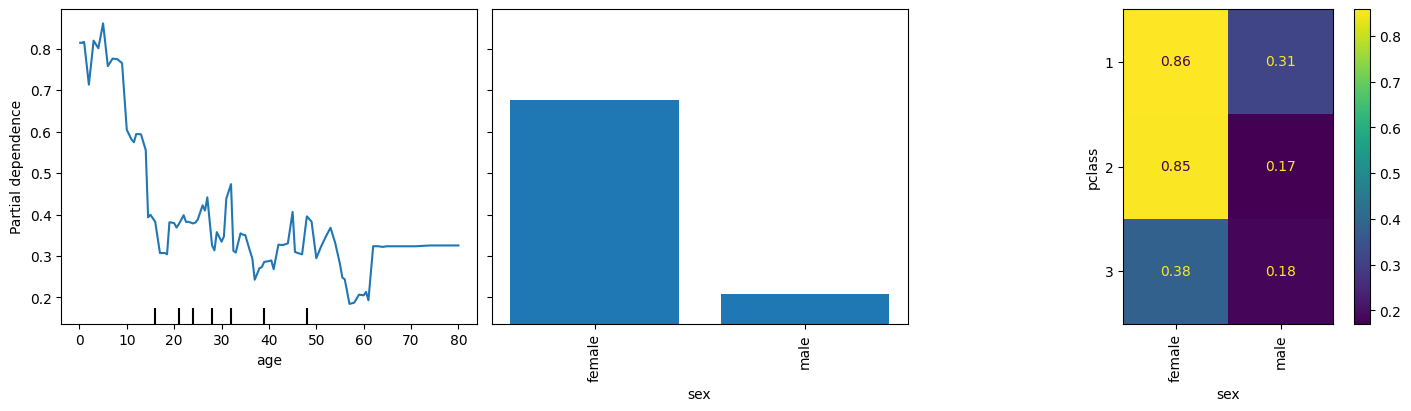

In [11]:
fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
_ = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=["age", "sex", ("pclass", "sex")],
    categorical_features=categorical_features,
    ax=ax,
)

In [12]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])